##1.Import Libraries

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [82]:
#Connect with the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
#Display All the columns
pd.set_option('display.max_columns', None)

In [84]:
#Read the data set
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Turn Time Forecasting Model/Data_CSV.csv')

#2.Data Formating

In [85]:
df.head()

,Account,Contact,Style Number,1st Sample All Ok Actual,1st Sample Submit Actual,1st Sample Approve Actual,2nd Sample All Ok Actual,2nd Sample Submit Actual,2nd Sample Approve Actual,3rd Sample All Ok Actual,3rd Sample Submit Actual,3rd Sample Approve Actual,4th Sample All Ok Actual,4th Sample Submit Actual,4th Sample Approve Actual,Target Cut,ACC Name,Sub ACC Name,Sample Round Name,Sample Room,Sample Room Capasity,Pattern Dept Capasity,Type of the Garment,SMV,Target Cut Year,Target Cut Month,Primary Key,ACC_Ref_No
0,212,6426L,435233RN/R3,2/13/2020,2/13/2020,2/13/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4/8/2020,LANDS END,LANDS END,1,SR1,55,12,PANT,10.11,2020,4,20204SR1,ACC02
1,212,6426L,435234PN/R3,2/13/2020,2/13/2020,2/13/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4/8/2020,LANDS END,LANDS END,1,SR1,55,12,PANT,10.11,2020,4,20204SR1,ACC02
2,212,6426L,435236XN/R3,2/13/2020,2/13/2020,2/13/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4/8/2020,LANDS END,LANDS END,1,SR1,55,12,PANT,11.61,2020,4,20204SR1,ACC02
3,212,6426L,435237XPN/R3,2/13/2020,2/13/2020,2/13/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4/8/2020,LANDS END,LANDS END,1,SR1,55,12,PANT,11.61,2020,4,20204SR1,ACC02
4,212,6426L,520775R,4/21/2020,4/21/2020,4/21/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4/8/2020,LANDS END,LANDS END,1,SR1,55,12,JACKET,42.86,2020,4,20204SR1,ACC02


In [86]:
df.rename(columns ={'Sample Round Name':'No_of_Samples_Made'}, inplace = True)
df.rename(columns ={'Type of the Garment':'Type_of_the_Garment'}, inplace = True)
df.rename(columns ={'ACC Name':'ACC_Name'}, inplace = True)
df.rename(columns ={'Sub ACC Name':'Sub_ACC_Name'}, inplace = True)
df.rename(columns ={'Sample Room':'Sample_Room'}, inplace = True)
df.rename(columns ={'Pattern Dept Capasity':'Pattern_Dept_Capacity'}, inplace = True)
df.rename(columns ={'Sample Room Capasity':'Sample_Room_Capacity'}, inplace = True)

In [87]:
df.columns

Index(['Account', 'Contact', 'Style Number', '1st Sample All Ok Actual',
       '1st Sample Submit Actual', '1st Sample Approve Actual',
       '2nd Sample All Ok Actual', '2nd Sample Submit Actual',
       '2nd Sample Approve Actual', '3rd Sample All Ok Actual',
       '3rd Sample Submit Actual', '3rd Sample Approve Actual',
       '4th Sample All Ok Actual', '4th Sample Submit Actual',
       '4th Sample Approve Actual', 'Target Cut', 'ACC_Name', 'Sub_ACC_Name',
       'No_of_Samples_Made', 'Sample_Room', 'Sample_Room_Capacity',
       'Pattern_Dept_Capacity', 'Type_of_the_Garment', 'SMV',
       'Target Cut Year', 'Target Cut Month', 'Primary Key', 'ACC_Ref_No'],
      dtype='object')

In [88]:
 #Sample Round Development Process Tracking Data Columns - 1st Fit / 2nd Fit / 3rd Fit / Pre-prodution
date_columns=['1st Sample All Ok Actual',
       '1st Sample Submit Actual', '1st Sample Approve Actual',
       '2nd Sample All Ok Actual', '2nd Sample Submit Actual',
       '2nd Sample Approve Actual', '3rd Sample All Ok Actual',
       '3rd Sample Submit Actual', '3rd Sample Approve Actual','4th Sample All Ok Actual', '4th Sample Submit Actual',
       '4th Sample Approve Actual']

In [89]:
# Remove the spaces
clms_to_strip=['ACC_Name','Sub_ACC_Name','Type_of_the_Garment','ACC_Ref_No']

for i in clms_to_strip:
    df[i]=df[i].apply(lambda x: x.strip())

In [90]:
#Convert the dates to data time format
for i in date_columns:
    df[i]=pd.to_datetime(df[i])

In [91]:
#Convert the Account Numbers to Sring Values
df.Account=df.Account.astype(str)

In [92]:
df.describe(include='all',datetime_is_numeric=True)

,Account,Contact,Style Number,1st Sample All Ok Actual,1st Sample Submit Actual,1st Sample Approve Actual,2nd Sample All Ok Actual,2nd Sample Submit Actual,2nd Sample Approve Actual,3rd Sample All Ok Actual,3rd Sample Submit Actual,3rd Sample Approve Actual,4th Sample All Ok Actual,4th Sample Submit Actual,4th Sample Approve Actual,Target Cut,ACC_Name,Sub_ACC_Name,No_of_Samples_Made,Sample_Room,Sample_Room_Capacity,Pattern_Dept_Capacity,Type_of_the_Garment,SMV,Target Cut Year,Target Cut Month,Primary Key,ACC_Ref_No
count,8219,8219,8219,8219,8202,7354,1063,1070,1014,1508,1491,1448,442,437,401,8219,8219,8219,8219.000000,8219,8219.000000,8219.000000,8219,8219.000000,8219.000000,8219.000000,8219,8219
unique,78,1590,8202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,605,32,77,NaN,3,NaN,NaN,67,NaN,NaN,NaN,87,27
top,709,C830M,##############################################...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12/18/2020,KOMAR,KOMAR-RALPH LAUREN,NaN,SR3,NaN,NaN,PAJAMA (T),NaN,NaN,NaN,202012IC,ACC11
freq,1019,166,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108,4226,1019,NaN,4983,NaN,NaN,1491,NaN,NaN,NaN,476,4861
mean,NaN,NaN,NaN,2021-02-01 15:48:01.664435968,2021-02-10 07:28:13.343087104,2021-03-13 11:27:41.463149312,2021-01-03 03:57:03.894637824,2021-01-14 09:33:18.504673024,2021-01-28 12:15:37.278106624,2021-03-09 11:03:39.628647424,2021-03-21 19:50:49.496982016,2021-03-25 07:29:30.165745920,2021-02-15 11:43:42.624434432,2021-02-25 14:59:35.286041088,2021-03-22 20:46:05.087281664,NaN,NaN,NaN,1.534980,NaN,54.199538,15.478647,NaN,19.932439,2020.826378,6.005110,NaN,NaN
min,NaN,NaN,NaN,2003-11-10 00:00:00,2017-05-16 00:00:00,2017-05-16 00:00:00,2018-07-25 00:00:00,2018-08-01 00:00:00,2018-08-16 00:00:00,2017-08-07 00:00:00,2017-08-21 00:00:00,2017-08-18 00:00:00,2019-11-25 00:00:00,2019-11-30 00:00:00,2019-12-18 00:00:00,NaN,NaN,NaN,1.000000,NaN,24.000000,8.000000,NaN,1.730000,2020.000000,1.000000,NaN,NaN
25%,NaN,NaN,NaN,2020-07-30 00:00:00,2020-08-10 00:00:00,2020-09-16 00:00:00,2020-06-16 00:00:00,2020-06-26 00:00:00,2020-07-21 06:00:00,2020-09-22 18:00:00,2020-09-22 00:00:00,2020-10-02 00:00:00,2020-06-28 18:00:00,2020-07-06 00:00:00,2020-09-17 00:00:00,NaN,NaN,NaN,1.000000,NaN,43.000000,11.000000,NaN,10.540000,2020.000000,3.000000,NaN,NaN
50%,NaN,NaN,NaN,2021-02-05 00:00:00,2021-02-11 00:00:00,2021-03-17 00:00:00,2021-01-12 00:00:00,2021-01-25 12:00:00,2021-02-02 00:00:00,2021-03-01 00:00:00,2021-03-11 00:00:00,2021-03-12 00:00:00,2021-03-12 00:00:00,2021-03-22 00:00:00,2021-04-02 00:00:00,NaN,NaN,NaN,1.000000,NaN,58.000000,17.000000,NaN,16.580000,2021.000000,5.000000,NaN,NaN
75%,NaN,NaN,NaN,2021-09-10 00:00:00,2021-09-15 00:00:00,2021-10-14 18:00:00,2021-08-14 00:00:00,2021-08-25 00:00:00,2021-09-14 00:00:00,2021-10-22 00:00:00,2021-10-30 00:00:00,2021-11-17 00:00:00,2021-09-22 00:00:00,2021-10-04 00:00:00,2021-10-02 00:00:00,NaN,NaN,NaN,2.000000,NaN,66.000000,19.000000,NaN,25.170000,2021.000000,10.000000,NaN,NaN
max,NaN,NaN,NaN,2022-05-24 00:00:00,2022-05-24 00:00:00,2022-05-24 00:00:00,2022-04-29 00:00:00,2022-05-12 00:00:00,2022-05-30 00:00:00,2022-06-11 00:00:00,2022-05-30 00:00:00,2022-06-10 00:00:00,2022-05-13 00:00:00,2022-05-14 00:00:00,2022-05-18 00:00:00,NaN,NaN,NaN,4.000000,NaN,74.000000,19.000000,NaN,106.890000,2022.000000,12.000000,NaN,NaN


#3.Feature Engineering

In [93]:
df['first_date']=df[date_columns].min(axis=1)
df['last_date']=df[date_columns].max(axis=1)

In [94]:
#Sample Garment Order Recieving Date - Sample Garment Order Approval Date
df['turn_time']=df.apply(lambda x: (x['last_date']-x['first_date']).days,axis=1)

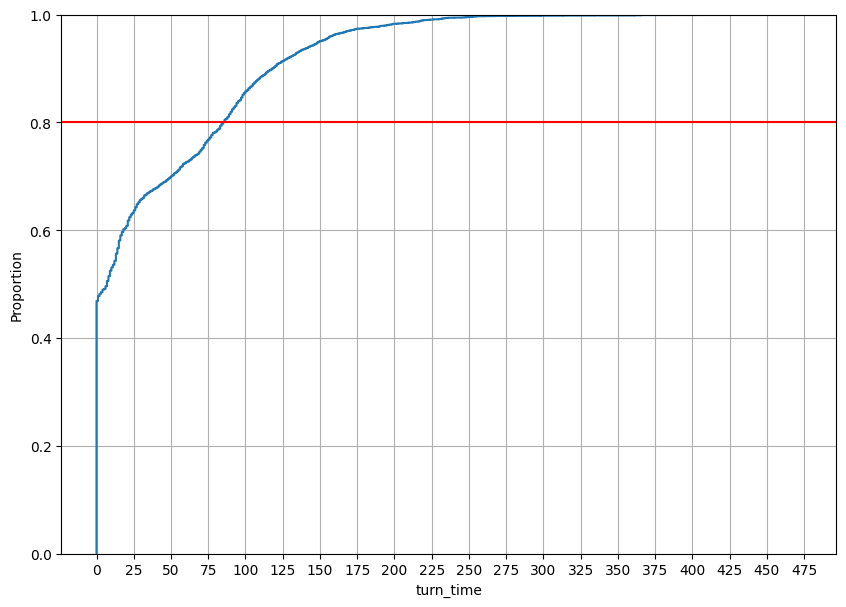

In [95]:
#Plot the Turn Time Vs Turn Time Data Proportion.
x_ticks=np.arange(0,500,25)
plt.figure(figsize=(10,7))
sns.ecdfplot(df[df.turn_time<500].turn_time)

plt.axhline (0.8, c='red');
plt.xticks(x_ticks,x_ticks)
plt.grid()

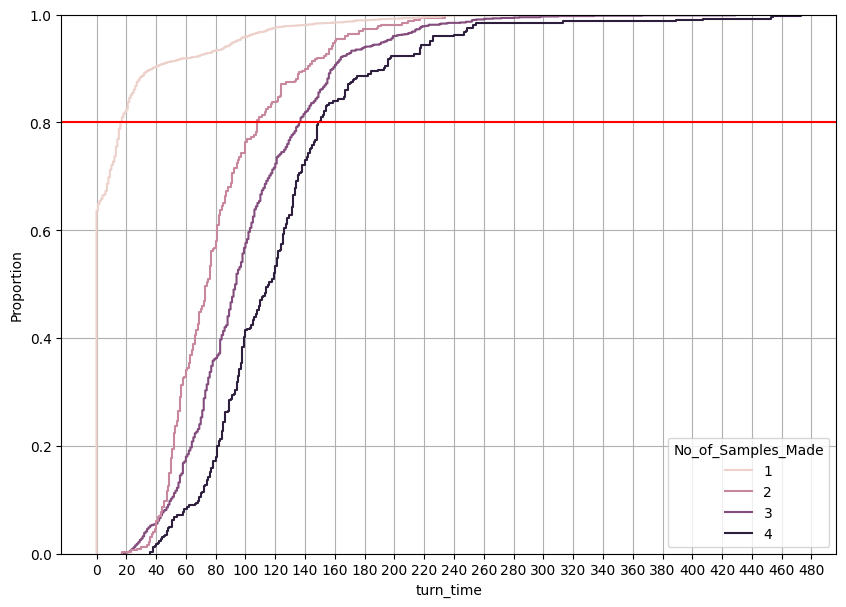

In [96]:
#Plot the Turn Time Vs Turn Time Data Proportion. (Sample Round View)
x_ticks=np.arange(0,500,20)
plt.figure(figsize=(10,7))
sns.ecdfplot(data=df[df.turn_time<500],x='turn_time',hue='No_of_Samples_Made')
plt.xticks(x_ticks,x_ticks)
plt.axhline (0.8, c='red');
plt.grid()

In [97]:
# Number of records according to each sample rounds
df['No_of_Samples_Made'].value_counts()

1    6058
3    1434
4     401
2     326
Name: No_of_Samples_Made, dtype: int64

In [98]:
df.shape

(8219, 31)

In [99]:
 #Defined the Turn Times Ranges for Sample Rounds and Remove the overfiiting and underfittings
df=df[((df['No_of_Samples_Made']==1) & (df.turn_time.between(7,30,inclusive=True))) #Sample Round 1 - Days 7 - 30
| ((df['No_of_Samples_Made']==2) & (df.turn_time.between(7,60,inclusive=True)))     #Sample Round 2 - Days 7 - 60
| ((df['No_of_Samples_Made']==3) & (df.turn_time.between(7,90,inclusive=True)))     #Sample Round 3 - Days 7 - 95
| ((df['No_of_Samples_Made']==4) & (df.turn_time.between(7,120,inclusive=True)))].reset_index(drop=True) #Sample Round 3 - Days 7 - 120

<ipython-input-99-2e1eef52ba6d>:2: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df=df[((df['No_of_Samples_Made']==1) & (df.turn_time.between(7,30,inclusive=True))) #Sample Round 1 - Days 7 - 30
<ipython-input-99-2e1eef52ba6d>:3: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  | ((df['No_of_Samples_Made']==2) & (df.turn_time.between(7,60,inclusive=True)))     #Sample Round 2 - Days 7 - 60
<ipython-input-99-2e1eef52ba6d>:4: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  | ((df['No_of_Samples_Made']==3) & (df.turn_time.between(7,90,inclusive=True)))     #Sample Round 3 - Days 7 - 95
<ipython-input-99-2e1eef52ba6d>:5: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  | ((df['No_of_Samples_Made']==4) & (df.turn_time.between(7,120,inclusive=True)))].

In [100]:
# Number of records according to each sample rounds
df['No_of_Samples_Made'].value_counts()

1    1286
3     668
4     214
2     111
Name: No_of_Samples_Made, dtype: int64

In [101]:
df.shape

(2279, 31)

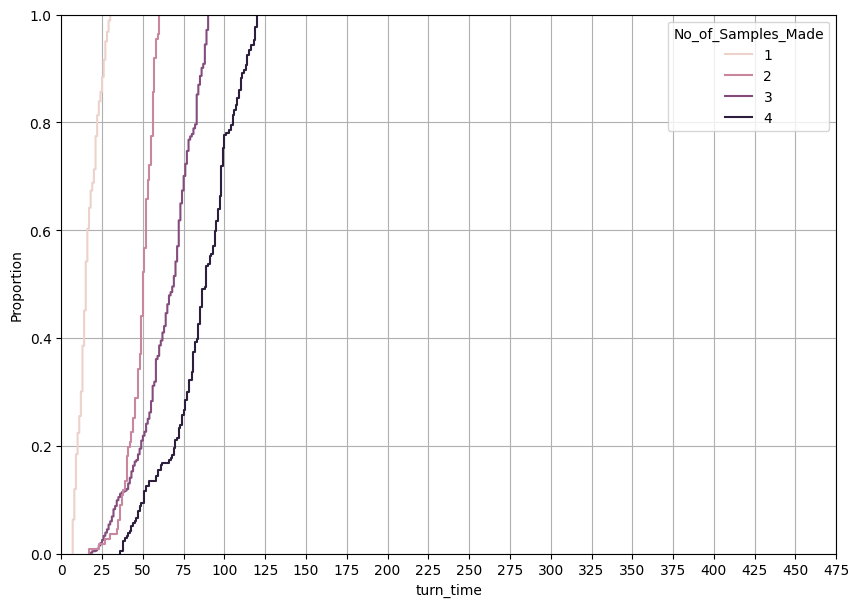

In [102]:
x_ticks=np.arange(0,500,25)
plt.figure(figsize=(10,7))
sns.ecdfplot(data=df[df.turn_time<500],x='turn_time',hue='No_of_Samples_Made')
plt.xticks(x_ticks,x_ticks)
plt.grid()

#4.Hypothesis Testing

In [103]:
#Drop the Target Cut Month and Target Cut Year From the Data Set
df.drop(['Target Cut Month','Target Cut Year'], axis =1, inplace = True)

##Numarical to Nmarical - Correlation Coefficient

<ipython-input-104-5742ed5a63bf>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,fmt='.2f')


<Axes: >

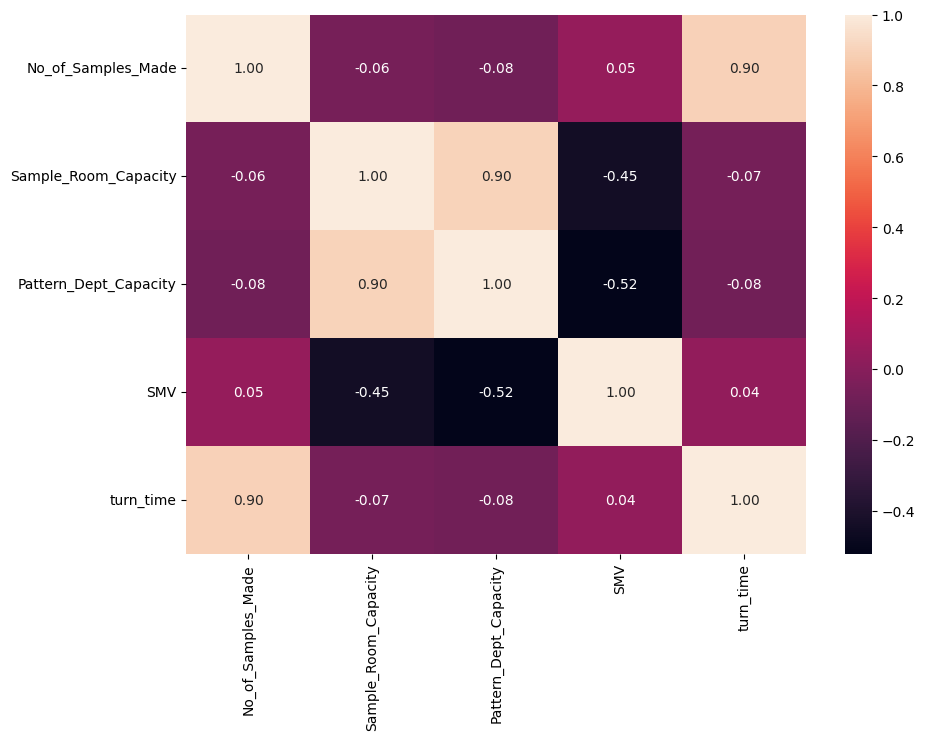

In [104]:
#Heat Map
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,fmt='.2f')

In [105]:
np.corrcoef(df['turn_time'],df['No_of_Samples_Made'])

array([[1.        , 0.89641989],
       [0.89641989, 1.        ]])

In [106]:
df.corr()

<ipython-input-106-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,No_of_Samples_Made,Sample_Room_Capacity,Pattern_Dept_Capacity,SMV,turn_time
No_of_Samples_Made,1.000000,-0.057633,-0.082271,0.048982,0.896420
Sample_Room_Capacity,-0.057633,1.000000,0.904259,-0.446947,-0.068176
Pattern_Dept_Capacity,-0.082271,0.904259,1.000000,-0.520779,-0.075457
SMV,0.048982,-0.446947,-0.520779,1.000000,0.035912
turn_time,0.896420,-0.068176,-0.075457,0.035912,1.000000


In [107]:
from scipy.stats import pearsonr

#turn time Vs No of Sample Made
pearsonr(df.turn_time,df.No_of_Samples_Made) #1st Hypothesis

PearsonRResult(statistic=0.8964198853676257, pvalue=0.0)

In [108]:
#turn time vs Sample_Room Capacity
pearsonr(df.turn_time,df['Sample_Room_Capacity']) #2nd Hypothesis

PearsonRResult(statistic=-0.06817570849774389, pvalue=0.0011274116350210232)

In [109]:
#turn time vs Pattern Dept Capacity
pearsonr(df.turn_time,df['Pattern_Dept_Capacity']) #3rd Hypothesis

PearsonRResult(statistic=-0.07545730552330798, pvalue=0.0003116589151688681)

In [110]:
#turm time vs SMV
pearsonr(df.turn_time,df.SMV) #4th Hypothesis

PearsonRResult(statistic=0.035911950003955785, pvalue=0.08652719858435899)

##Catergorical to Numarical Relationship - ANOVA Test

In [111]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [112]:
H5 = ols('turn_time ~ C(Type_of_the_Garment)',data = df).fit()
sm.stats.anova_lm(H5,typ=2) #5th Hypothesis

,sum_sq,df,F,PR(>F)
C(Type_of_the_Garment),1.419783e+05,45.0,3.895655,1.793099e-16
Residual,1.808497e+06,2233.0,NaN,NaN


In [113]:
H6 = ols('turn_time ~ C(ACC_Name)',data = df).fit()
sm.stats.anova_lm(H6,typ=2) #6th Hypothesis

,sum_sq,df,F,PR(>F)
C(ACC_Name),5.016616e+05,27.0,28.867562,1.778785e-124
Residual,1.448813e+06,2251.0,NaN,NaN


In [114]:
H7 = ols('turn_time ~ C(Sample_Room)',data = df).fit()
sm.stats.anova_lm(H7,typ=2) #7th Hypothesis

,sum_sq,df,F,PR(>F)
C(Sample_Room),1.601179e+04,2.0,9.419366,0.000084
Residual,1.934463e+06,2276.0,NaN,NaN


#5.Analysis (Discriptive)

Describe the Pre-processed Data Set

<Axes: xlabel='turn_time', ylabel='Count'>

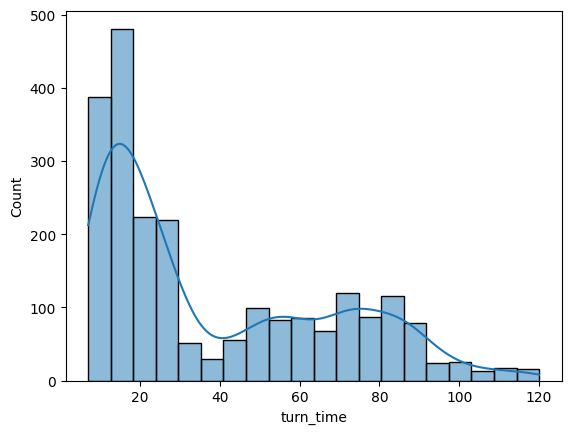

In [115]:
sns.histplot(x = 'turn_time',data =df, bins =20, kde = True)

In [116]:
df.columns

Index(['Account', 'Contact', 'Style Number', '1st Sample All Ok Actual',
       '1st Sample Submit Actual', '1st Sample Approve Actual',
       '2nd Sample All Ok Actual', '2nd Sample Submit Actual',
       '2nd Sample Approve Actual', '3rd Sample All Ok Actual',
       '3rd Sample Submit Actual', '3rd Sample Approve Actual',
       '4th Sample All Ok Actual', '4th Sample Submit Actual',
       '4th Sample Approve Actual', 'Target Cut', 'ACC_Name', 'Sub_ACC_Name',
       'No_of_Samples_Made', 'Sample_Room', 'Sample_Room_Capacity',
       'Pattern_Dept_Capacity', 'Type_of_the_Garment', 'SMV', 'Primary Key',
       'ACC_Ref_No', 'first_date', 'last_date', 'turn_time'],
      dtype='object')

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2279 entries, 0 to 2278
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Account                    2279 non-null   object        
 1   Contact                    2279 non-null   object        
 2   Style Number               2279 non-null   object        
 3   1st Sample All Ok Actual   2279 non-null   datetime64[ns]
 4   1st Sample Submit Actual   2274 non-null   datetime64[ns]
 5   1st Sample Approve Actual  1912 non-null   datetime64[ns]
 6   2nd Sample All Ok Actual   389 non-null    datetime64[ns]
 7   2nd Sample Submit Actual   394 non-null    datetime64[ns]
 8   2nd Sample Approve Actual  383 non-null    datetime64[ns]
 9   3rd Sample All Ok Actual   680 non-null    datetime64[ns]
 10  3rd Sample Submit Actual   675 non-null    datetime64[ns]
 11  3rd Sample Approve Actual  674 non-null    datetime64[ns]
 12  4th Sa

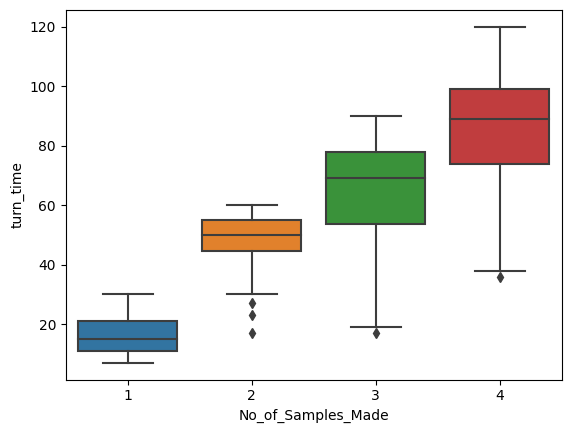

In [118]:
sns.boxplot(data=df,x='No_of_Samples_Made',y='turn_time');

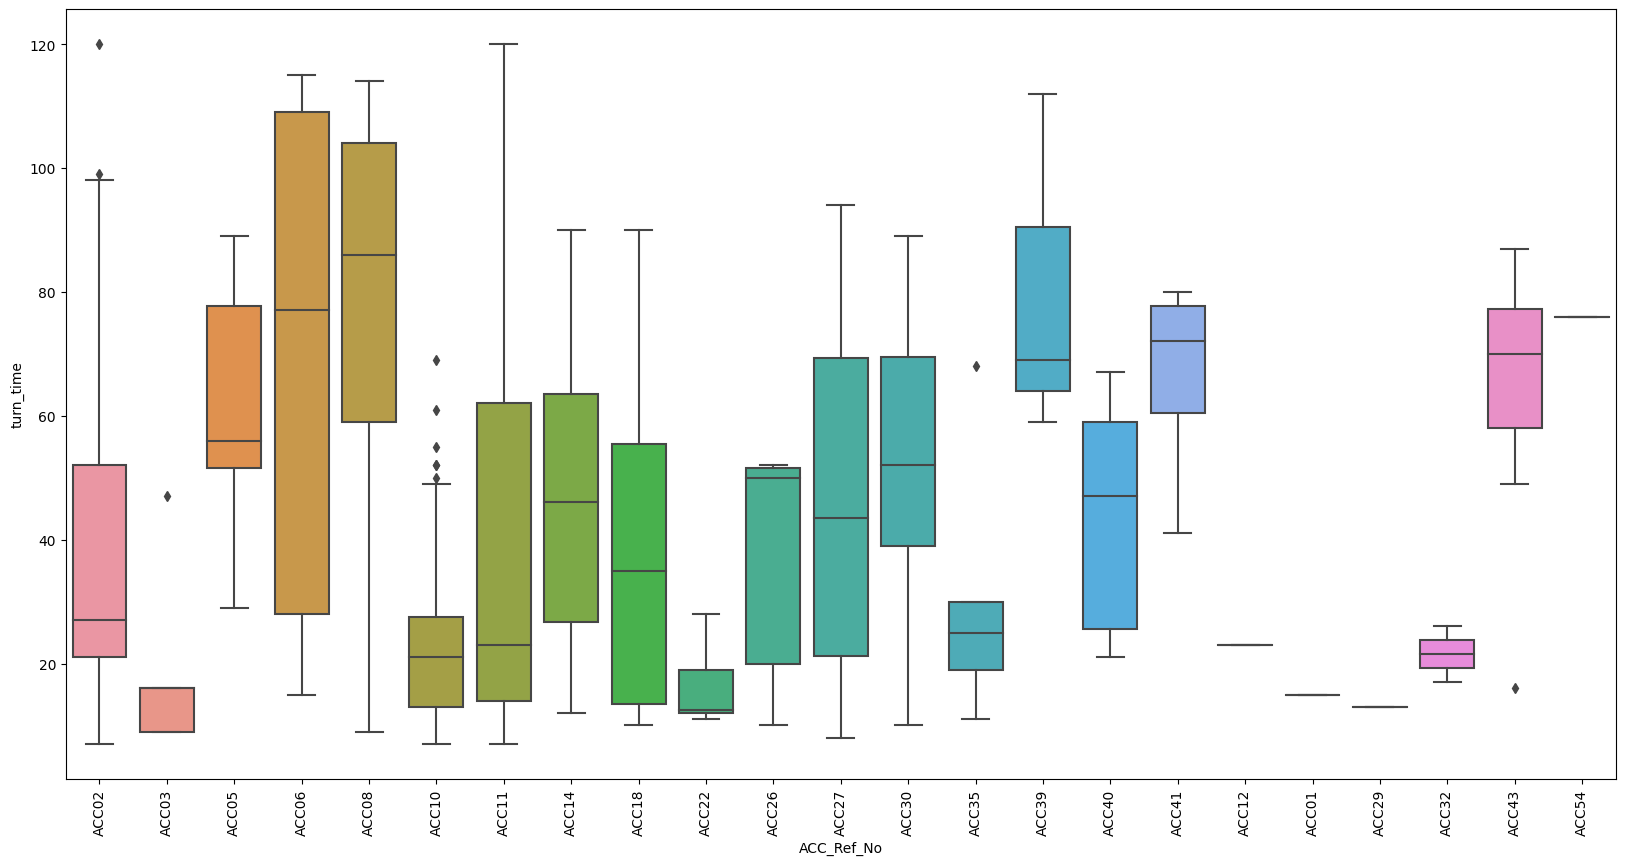

In [119]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df,x='ACC_Ref_No',y='turn_time')
plt.xticks(rotation=90);

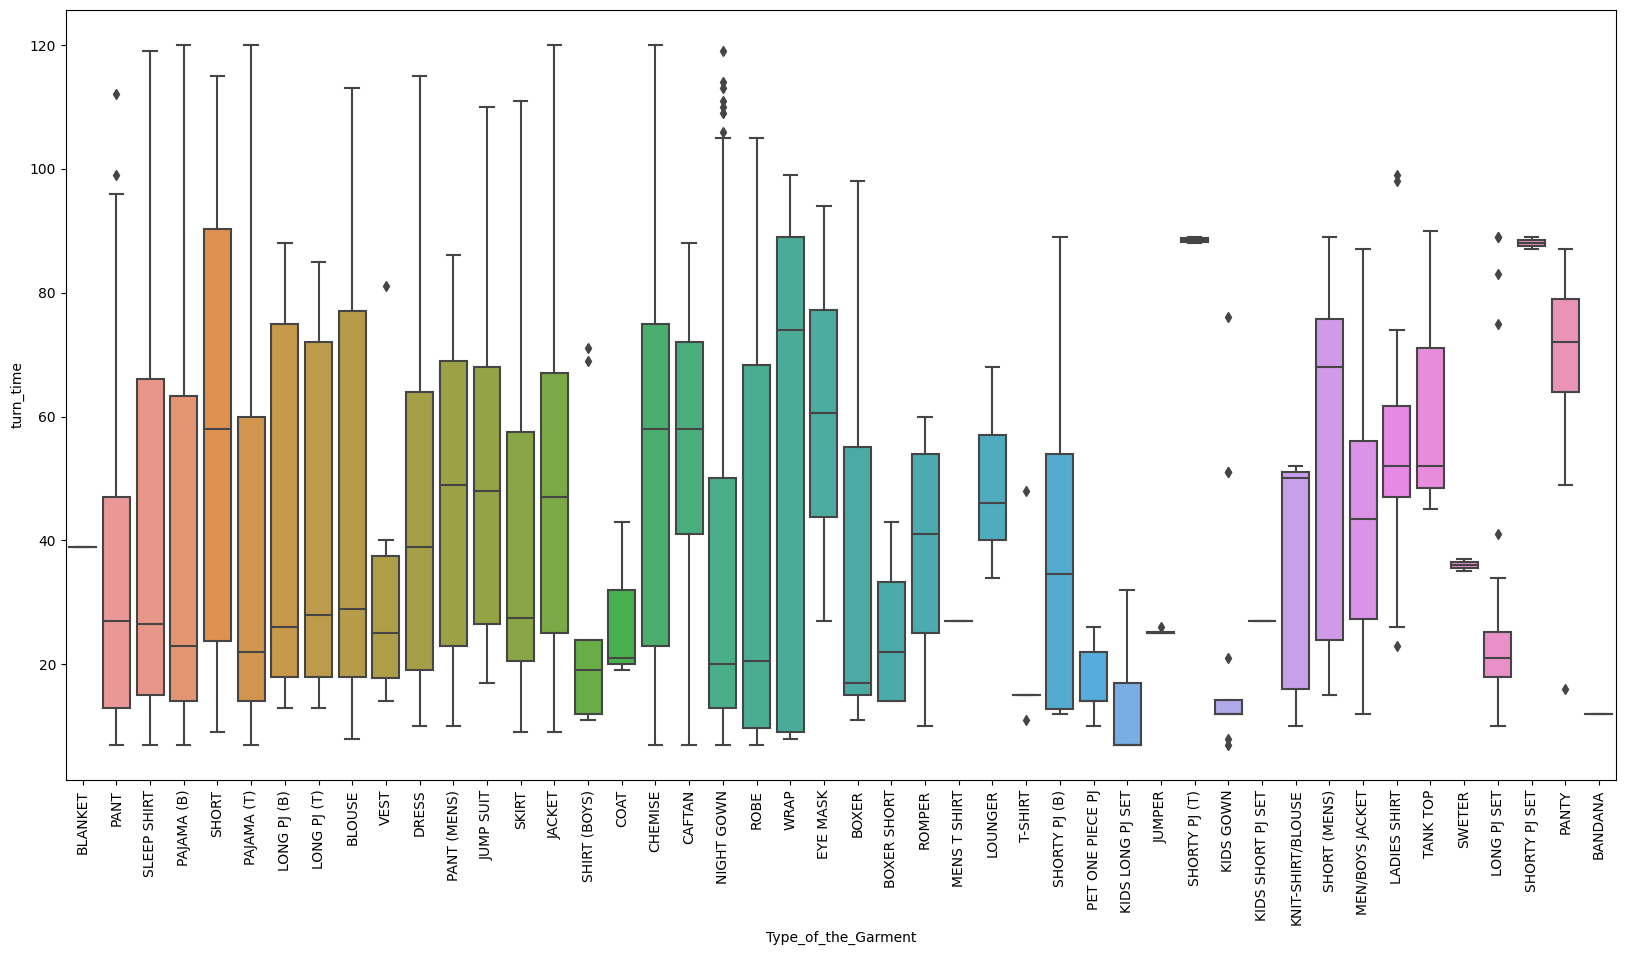

In [120]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df,x='Type_of_the_Garment',y='turn_time')
plt.xticks(rotation=90);

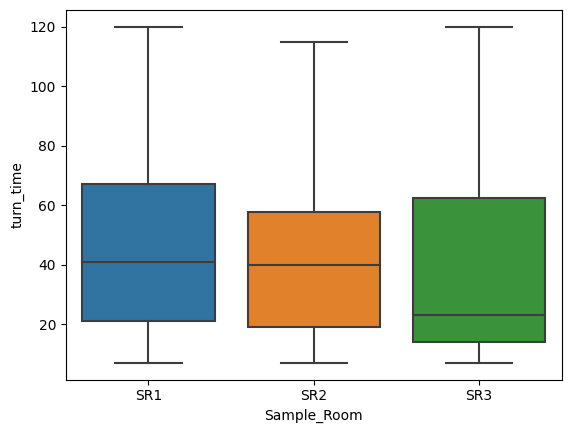

In [121]:
sns.boxplot(data=df,x='Sample_Room',y='turn_time');

<Axes: xlabel='Sample_Room_Capacity', ylabel='turn_time'>

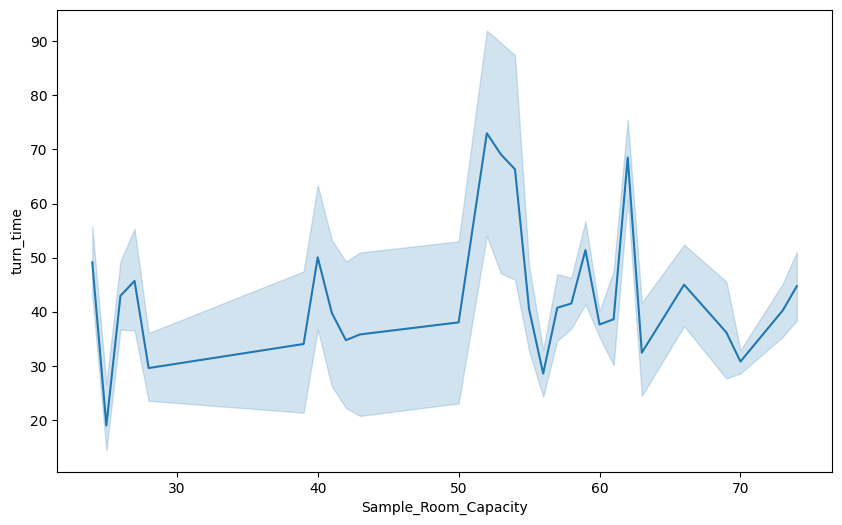

In [122]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df,x='Sample_Room_Capacity',y='turn_time')

<Axes: xlabel='Pattern_Dept_Capacity', ylabel='turn_time'>

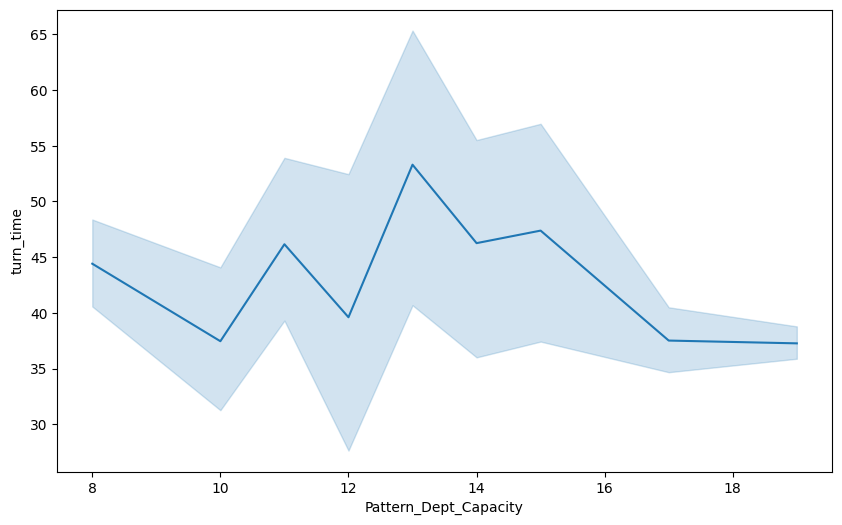

In [123]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df,x='Pattern_Dept_Capacity',y='turn_time')

###HeatMap

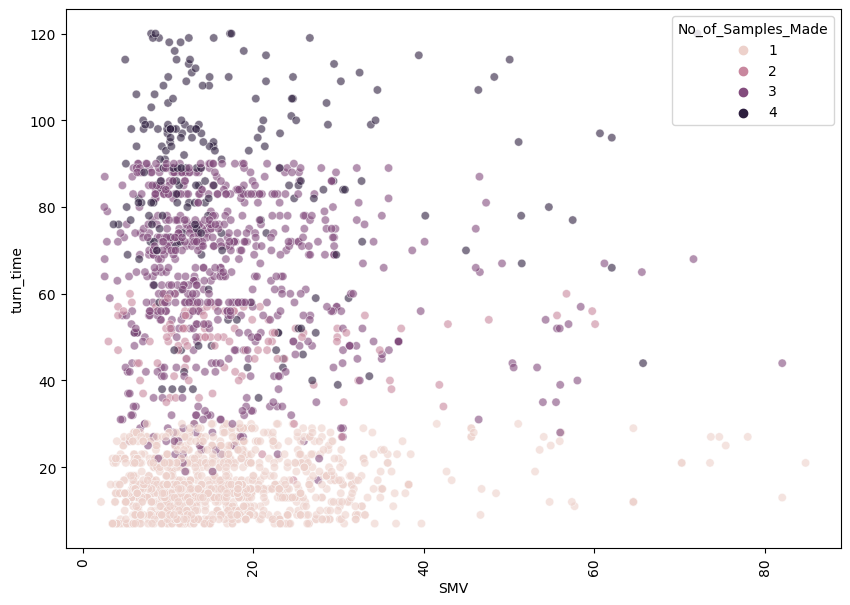

In [124]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df,x='SMV',y='turn_time',hue='No_of_Samples_Made',alpha=.6)
plt.xticks(rotation=90);

<ipython-input-125-448f35febdd8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,fmt='.2f')


<Axes: >

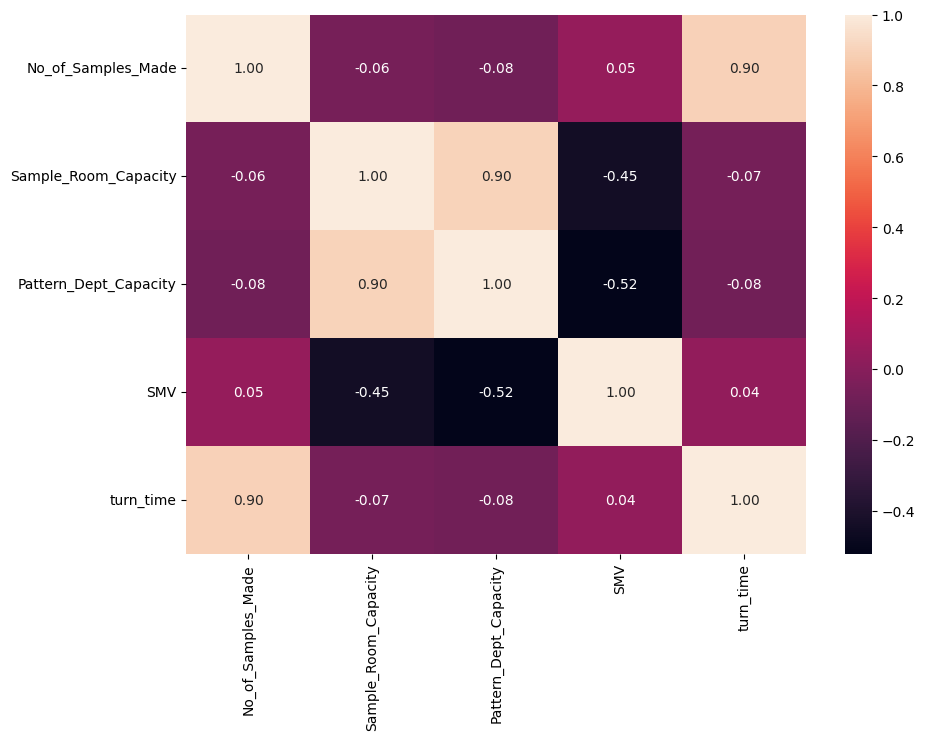

In [125]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,fmt='.2f')

In [126]:
#remove the previouse index
df=df.reset_index(drop=True)
df.head()

,Account,Contact,Style Number,1st Sample All Ok Actual,1st Sample Submit Actual,1st Sample Approve Actual,2nd Sample All Ok Actual,2nd Sample Submit Actual,2nd Sample Approve Actual,3rd Sample All Ok Actual,3rd Sample Submit Actual,3rd Sample Approve Actual,4th Sample All Ok Actual,4th Sample Submit Actual,4th Sample Approve Actual,Target Cut,ACC_Name,Sub_ACC_Name,No_of_Samples_Made,Sample_Room,Sample_Room_Capacity,Pattern_Dept_Capacity,Type_of_the_Garment,SMV,Primary Key,ACC_Ref_No,first_date,last_date,turn_time
0,212,B533B,4/17/3309,2020-05-18,2020-05-30,2020-06-04,NaT,NaT,NaT,NaT,NaT,NaT,2020-06-12,2020-06-18,2020-06-26,6/25/2020,LANDS END,LANDS END,4,SR1,57,14,BLANKET,29.90,20206SR1,ACC02,2020-05-18,2020-06-26,39
1,265,6493I,##############################################...,2019-12-09,2019-12-20,2020-01-04,NaT,NaT,NaT,2020-01-09,2020-01-21,2020-01-25,NaT,NaT,NaT,2/3/2020,EXPRESS,EXPRESS WOMEN,3,SR2,28,10,PANT,30.51,20202SR3,ACC03,2019-12-09,2020-01-25,47
2,265,6493I,9211203L,2020-01-09,2020-01-21,2020-01-25,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2/3/2020,EXPRESS,EXPRESS WOMEN,1,SR2,28,10,PANT,30.51,20202SR3,ACC03,2020-01-09,2020-01-25,16
3,265,6493I,9211203S,2020-01-09,2020-01-21,2020-01-25,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2/3/2020,EXPRESS,EXPRESS WOMEN,1,SR2,28,10,PANT,30.51,20202SR3,ACC03,2020-01-09,2020-01-25,16
4,265,6493K,9211480L,2020-07-20,2020-07-21,2020-07-29,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,8/11/2020,EXPRESS,EXPRESS WOMEN,1,SR2,26,10,PANT,19.44,20208SR3,ACC03,2020-07-20,2020-07-29,9


#6.Feature Selection and Encoding

In [127]:
# Define the depedant varible (Y-Target --Turn Around Time)
y=df.turn_time

In [128]:
y.reset_index()

,index,turn_time
0,0,39
1,1,47
2,2,16
3,3,16
4,4,9
...,...,...
2274,2274,75
2275,2275,78
2276,2276,35
2277,2277,30


In [129]:
#Define the numarical features
num_features=df[['Pattern_Dept_Capacity','SMV','No_of_Samples_Made','Sample_Room_Capacity']]

##Handle Categorical Features Many Categories(One Hot Encoding)

In [130]:
#Define the catergorical varibles
cat_features=pd.get_dummies(df[['Type_of_the_Garment','ACC_Ref_No','Sample_Room']],drop_first=True)

In [131]:
cat_features.shape

(2279, 69)

In [132]:
cat_features.reset_index()

,index,Type_of_the_Garment_BLANKET,Type_of_the_Garment_BLOUSE,Type_of_the_Garment_BOXER,Type_of_the_Garment_BOXER SHORT,Type_of_the_Garment_CAFTAN,Type_of_the_Garment_CHEMISE,Type_of_the_Garment_COAT,Type_of_the_Garment_DRESS,Type_of_the_Garment_EYE MASK,Type_of_the_Garment_JACKET,Type_of_the_Garment_JUMP SUIT,Type_of_the_Garment_JUMPER,Type_of_the_Garment_KIDS GOWN,Type_of_the_Garment_KIDS LONG PJ SET,Type_of_the_Garment_KIDS SHORT PJ SET,Type_of_the_Garment_KNIT-SHIRT/BLOUSE,Type_of_the_Garment_LADIES SHIRT,Type_of_the_Garment_LONG PJ (B),Type_of_the_Garment_LONG PJ (T),Type_of_the_Garment_LONG PJ SET,Type_of_the_Garment_LOUNGER,Type_of_the_Garment_MEN/BOYS JACKET,Type_of_the_Garment_MENS T SHIRT,Type_of_the_Garment_NIGHT GOWN,Type_of_the_Garment_PAJAMA (B),Type_of_the_Garment_PAJAMA (T),Type_of_the_Garment_PANT,Type_of_the_Garment_PANT (MENS),Type_of_the_Garment_PANTY,Type_of_the_Garment_PET ONE PIECE PJ,Type_of_the_Garment_ROBE,Type_of_the_Garment_ROMPER,Type_of_the_Garment_SHIRT (BOYS),Type_of_the_Garment_SHORT,Type_of_the_Garment_SHORT (MENS),Type_of_the_Garment_SHORTY PJ (B),Type_of_the_Garment_SHORTY PJ (T),Type_of_the_Garment_SHORTY PJ SET,Type_of_the_Garment_SKIRT,Type_of_the_Garment_SLEEP SHIRT,Type_of_the_Garment_SWETER,Type_of_the_Garment_T-SHIRT,Type_of_the_Garment_TANK TOP,Type_of_the_Garment_VEST,Type_of_the_Garment_WRAP,ACC_Ref_No_ACC02,ACC_Ref_No_ACC03,ACC_Ref_No_ACC05,ACC_Ref_No_ACC06,ACC_Ref_No_ACC08,ACC_Ref_No_ACC10,ACC_Ref_No_ACC11,ACC_Ref_No_ACC12,ACC_Ref_No_ACC14,ACC_Ref_No_ACC18,ACC_Ref_No_ACC22,ACC_Ref_No_ACC26,ACC_Ref_No_ACC27,ACC_Ref_No_ACC29,ACC_Ref_No_ACC30,ACC_Ref_No_ACC32,ACC_Ref_No_ACC35,ACC_Ref_No_ACC39,ACC_Ref_No_ACC40,ACC_Ref_No_ACC41,ACC_Ref_No_ACC43,ACC_Ref_No_ACC54,Sample_Room_SR2,Sample_Room_SR3
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2274,2274,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2275,2275,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2276,2276,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2277,2277,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [133]:
#Define the independant varibles
x=pd.concat([num_features.reset_index(drop=True),cat_features.reset_index(drop=True)],axis=1)

##Handle Categorical Features Many Categories(Count/Frequency Encoding)

In [134]:
print( "Type_of_the_Garment Unique Labess " + str(len(df['Type_of_the_Garment'].unique())))
print( "ACC_Ref_No Unique Labels " + str(len(df['ACC_Ref_No'].unique())))
print( "Sample_Room Unique Labels " + str(len(df['Sample_Room'].unique())))

Type_of_the_Garment Unique Labess 46
ACC_Ref_No Unique Labels 23
Sample_Room Unique Labels 3


In [135]:
df_frequency_Garment = df.Type_of_the_Garment.value_counts().to_dict()
df_frequency_Garment

{'PAJAMA (T)': 578,
 'PAJAMA (B)': 568,
 'NIGHT GOWN': 200,
 'SLEEP SHIRT': 152,
 'CHEMISE': 101,
 'PANT': 75,
 'PANT (MENS)': 49,
 'BLOUSE': 45,
 'CAFTAN': 45,
 'KIDS LONG PJ SET': 44,
 'LONG PJ SET': 44,
 'DRESS': 41,
 'ROBE': 36,
 'MEN/BOYS JACKET': 30,
 'BOXER': 26,
 'JACKET': 25,
 'LONG PJ (B)': 18,
 'SHORT': 18,
 'LONG PJ (T)': 17,
 'SKIRT': 16,
 'LADIES SHIRT': 16,
 'KIDS GOWN': 16,
 'SHORTY PJ (B)': 12,
 'PET ONE PIECE PJ': 11,
 'JUMP SUIT': 11,
 'SHORT (MENS)': 10,
 'PANTY': 9,
 'SHIRT (BOYS)': 9,
 'KNIT-SHIRT/BLOUSE': 7,
 'T-SHIRT': 6,
 'VEST': 6,
 'WRAP': 5,
 'JUMPER': 4,
 'ROMPER': 4,
 'BOXER SHORT': 4,
 'LOUNGER': 3,
 'COAT': 3,
 'TANK TOP': 3,
 'SHORTY PJ (T)': 2,
 'SHORTY PJ SET': 2,
 'EYE MASK': 2,
 'SWETER': 2,
 'BLANKET': 1,
 'KIDS SHORT PJ SET': 1,
 'MENS T SHIRT': 1,
 'BANDANA': 1}

In [136]:
df_frequency_Acc = df.ACC_Ref_No.value_counts().to_dict()
df_frequency_Acc

{'ACC11': 1901,
 'ACC30': 79,
 'ACC10': 63,
 'ACC02': 41,
 'ACC18': 36,
 'ACC08': 34,
 'ACC27': 28,
 'ACC40': 15,
 'ACC14': 12,
 'ACC22': 10,
 'ACC05': 10,
 'ACC43': 10,
 'ACC06': 9,
 'ACC26': 6,
 'ACC03': 5,
 'ACC35': 5,
 'ACC41': 4,
 'ACC39': 3,
 'ACC01': 2,
 'ACC29': 2,
 'ACC32': 2,
 'ACC12': 1,
 'ACC54': 1}

In [137]:
df_frequency_Sample_Room = df.Sample_Room.value_counts().to_dict()
df_frequency_Sample_Room

{'SR3': 1912, 'SR2': 210, 'SR1': 157}

In [138]:
df.Type_of_the_Garment = df.Type_of_the_Garment.map(df_frequency_Garment)
df.ACC_Ref_No = df.ACC_Ref_No.map(df_frequency_Acc)
df.Sample_Room = df.Sample_Room.map(df_frequency_Sample_Room)

In [139]:
print( "Type_of_the_Garment Unique Lables " + str(len(df['Type_of_the_Garment'].unique())))
print( "ACC_Ref_No Unique Lables " + str(len(df['ACC_Ref_No'].unique())))
print( "Sample_Room Unique Lables " + str(len(df['Sample_Room'].unique())))

Type_of_the_Garment Unique Lables 28
ACC_Ref_No Unique Lables 17
Sample_Room Unique Lables 3


In [140]:
#Define the categorical varibles
cat_featurue_count_frq=df[['Type_of_the_Garment','ACC_Ref_No','Sample_Room']]

In [141]:
cat_featurue_count_frq.reset_index()

,index,Type_of_the_Garment,ACC_Ref_No,Sample_Room
0,0,1,41,157
1,1,75,5,210
2,2,75,5,210
3,3,75,5,210
4,4,75,5,210
...,...,...,...,...
2274,2274,30,79,210
2275,2275,30,79,210
2276,2276,30,79,210
2277,2277,25,5,210


In [142]:
#Define the independant varible
df_count_frq=pd.concat([num_features.reset_index(drop=True),cat_featurue_count_frq.reset_index(drop=True)],axis=1)

#7.**Solution Design**

#8.Import Machine Learning Libraries

In [143]:
from sklearn.preprocessing import StandardScaler #standardscaling
from sklearn.model_selection import train_test_split ,cross_validate
from sklearn.decomposition import PCA #principle component analysis
from sklearn.metrics import mean_squared_error as mse,r2_score,SCORERS #mean squre error

#ML Models
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor


#Validation
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold #K Fold Cross Validation
from sklearn.model_selection import cross_val_score

####MAPE Def

In [144]:
def mape(actual, pred):
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

####RMSE Def

In [145]:
def rmse(actual, pred):
    return np.sqrt(((actual - pred) ** 2).mean())

#Design 1.Model Design with Both Numerical and Categorical Features with Principal Component Analysis

In [146]:
 #Principle component analysis for 5 components
pca=PCA(n_components=5)
#fit the categorical  features
pca.fit(cat_features)

PCA(n_components=5)

In [147]:
pca_transformed=pca.transform(cat_features)

In [148]:
#PCA Data into Data frame
pca_analysis=pd.DataFrame(pca_transformed)
pca_analysis

,0,1,2,3,4
0,1.091941,0.022628,0.004908,0.054424,0.636036
1,1.524216,0.031427,-0.133196,-0.022287,0.142327
2,1.524216,0.031427,-0.133196,-0.022287,0.142327
3,1.524216,0.031427,-0.133196,-0.022287,0.142327
4,1.524216,0.031427,-0.133196,-0.022287,0.142327
...,...,...,...,...,...
2274,1.610637,0.034252,-0.189849,-0.094387,-0.734939
2275,1.610637,0.034252,-0.189849,-0.094387,-0.734939
2276,1.610637,0.034252,-0.189849,-0.094387,-0.734939
2277,1.455434,0.029163,-0.130180,-0.036889,-0.131200


In [149]:
#PCA 5 feature and Turn Around time - Ploting
pca_analysis_plot=pd.concat([pca_analysis,y],axis=1)
pca_analysis_plot

,0,1,2,3,4,turn_time
0,1.091941,0.022628,0.004908,0.054424,0.636036,39
1,1.524216,0.031427,-0.133196,-0.022287,0.142327,47
2,1.524216,0.031427,-0.133196,-0.022287,0.142327,16
3,1.524216,0.031427,-0.133196,-0.022287,0.142327,16
4,1.524216,0.031427,-0.133196,-0.022287,0.142327,9
...,...,...,...,...,...,...
2274,1.610637,0.034252,-0.189849,-0.094387,-0.734939,75
2275,1.610637,0.034252,-0.189849,-0.094387,-0.734939,78
2276,1.610637,0.034252,-0.189849,-0.094387,-0.734939,35
2277,1.455434,0.029163,-0.130180,-0.036889,-0.131200,30


In [150]:
#Part Plot for catergorical varibles
#sns.pairplot(pca_analysis_plot)

PCA Analysis DF concat with the Numarical Varible Concatination

In [151]:
#Concatinate the PCA Feature and Numerical Features and create new data frame as independant varible
df_PCAConcat=pd.concat([num_features.reset_index(drop=True),pca_analysis.reset_index(drop=True)],axis=1)

In [152]:
df_PCAConcat

,Pattern_Dept_Capacity,SMV,No_of_Samples_Made,Sample_Room_Capacity,0,1,2,3,4
0,14,29.90,4,57,1.091941,0.022628,0.004908,0.054424,0.636036
1,10,30.51,3,28,1.524216,0.031427,-0.133196,-0.022287,0.142327
2,10,30.51,1,28,1.524216,0.031427,-0.133196,-0.022287,0.142327
3,10,30.51,1,28,1.524216,0.031427,-0.133196,-0.022287,0.142327
4,10,19.44,1,26,1.524216,0.031427,-0.133196,-0.022287,0.142327
...,...,...,...,...,...,...,...,...,...
2274,8,46.10,3,24,1.610637,0.034252,-0.189849,-0.094387,-0.734939
2275,8,35.07,3,24,1.610637,0.034252,-0.189849,-0.094387,-0.734939
2276,8,22.33,3,24,1.610637,0.034252,-0.189849,-0.094387,-0.734939
2277,8,51.08,1,24,1.455434,0.029163,-0.130180,-0.036889,-0.131200


##Training and Testing Split

In [153]:
np.random.seed(42)
X1_train, X1_test, y_train, y_test = train_test_split(df_PCAConcat,y, test_size=0.2, random_state=42)

In [154]:
#Scale the varibales according to standard normal distribution
scaler=StandardScaler()
X1_train.columns = X1_train.columns.astype(str)
X1_test.columns = X1_test.columns.astype(str)

x_train =scaler.fit_transform(X1_train)
x_test =scaler.transform(X1_test)

#Model Training

##Decission Tree Regression

In [155]:
DecissionTree_model = DecisionTreeRegressor()

In [156]:
DecissionTree_model.fit(x_train,y_train)

DecisionTreeRegressor()

In [157]:
y_pred= DecissionTree_model.predict(x_test)

In [158]:
DecissionTree_model.score(x_test,y_test)

0.7341452636802577

In [159]:
kfold_validation=KFold(10)
results=cross_val_score(DecissionTree_model,x,y,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.38970752 0.64425919 0.61412753 0.62265225 0.40235106 0.60805573
 0.62740574 0.60754368 0.53741002 0.60656678]
0.566007951118764


In [160]:
r2_score(y_test, y_pred)

0.7341452636802577

In [161]:
mse(y_test,y_pred)

222.07208616780045

In [162]:
np.sqrt(mse(y_test,y_pred))

14.902083282809839

In [163]:
rmse(y_test,y_pred)

14.902083282809839

In [164]:
mean_absolute_error(y_test,y_pred)

8.8484544695071

In [165]:
MAPE=mape(y_test,y_pred)
print(MAPE)

29.597736991065567


<Axes: xlabel='turn_time', ylabel='Count'>

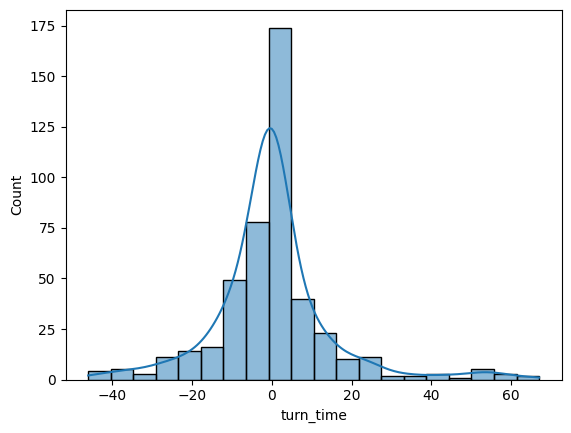

In [166]:
sns.histplot(x = y_test - y_pred,data =df, bins =20, kde = True)


##Random Forest Regression

In [167]:
RandomForest_model = RandomForestRegressor()

In [168]:
RandomForest_model.fit(x_train,y_train)

RandomForestRegressor()

In [169]:
y_pred= RandomForest_model.predict(x_test)

In [170]:
RandomForest_model.score(x_test,y_test)

0.8404942103208208

In [171]:
kfold_validation=KFold(10)
results=cross_val_score(RandomForest_model,x,y,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.64880113 0.76190031 0.72016283 0.78208801 0.60665405 0.68168226
 0.7573315  0.75678758 0.7104036  0.75790836]
0.7183719615578166


In [172]:
r2_score(y_test, y_pred)

0.8404942103208208

In [173]:
mse(y_test,y_pred)

133.2373609748148

In [174]:
rmse(y_test,y_pred)

11.542848910681228

In [175]:
mean_absolute_error(y_test,y_pred)

7.507100152892916

In [176]:
MAPE=mape(y_test,y_pred)
print(MAPE)

27.444255989275458


<Axes: xlabel='turn_time', ylabel='Count'>

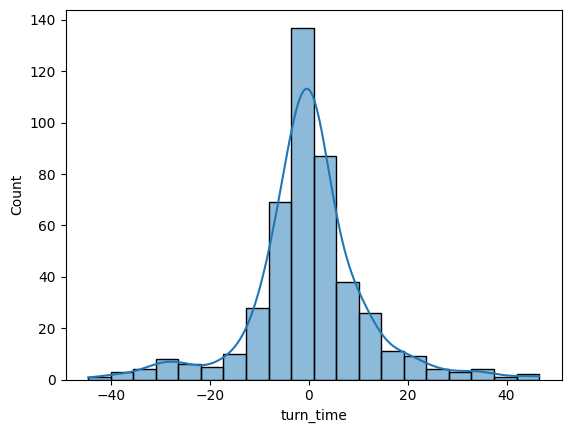

In [177]:
sns.histplot(x = y_test - y_pred,data =df, bins =20, kde = True)

##XGBOOST

In [178]:
XGBOOST_model = XGBRegressor()
print(XGBOOST_model)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)


In [179]:
XGBOOST_model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [180]:
y_pred= XGBOOST_model.predict(x_test)

In [181]:
XGBOOST_model.score(x_test,y_test)

0.8226683009192866

In [182]:
kfold_validation=KFold(10)
results=cross_val_score(XGBOOST_model,x,y,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.66093251 0.77694781 0.69982787 0.73458956 0.58944412 0.68527001
 0.76540682 0.74630393 0.70679476 0.7514981 ]
0.7117015500401084


In [183]:
r2_score(y_test, y_pred)

0.8226683009192866

In [184]:
mse(y_test,y_pred)

148.1275861535602

In [185]:
rmse(y_test,y_pred)

12.170767689573252

In [186]:
mean_absolute_error(y_test,y_pred)

8.051662514084263

In [187]:
MAPE=mape(y_test,y_pred)
print(MAPE)

29.805508268272686


<Axes: xlabel='turn_time', ylabel='Count'>

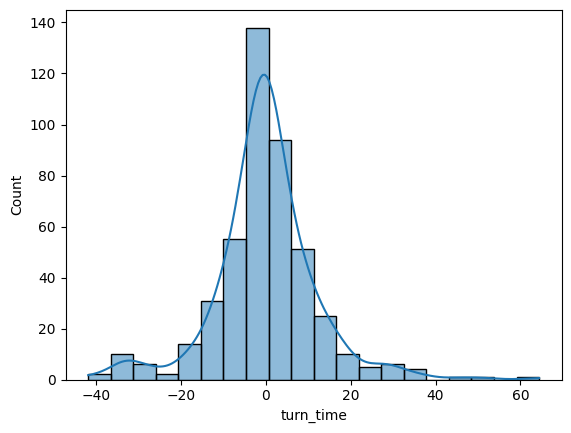

In [188]:
sns.histplot(x = y_test - y_pred,data =df, bins =20, kde = True)

##ADABOOST

In [189]:
DessicisionTree_estimator = DecisionTreeRegressor( max_depth = 1, random_state=0)
ADABOOST_model = AdaBoostRegressor(base_estimator = DessicisionTree_estimator, n_estimators = 50,learning_rate =1)
print(ADABOOST_model)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=1,
                                                       random_state=0),
                  learning_rate=1)


In [190]:
ADABOOST_model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=1,
                                                       random_state=0),
                  learning_rate=1)

In [191]:
y_pred= ADABOOST_model.predict(x_test)

In [192]:
ADABOOST_model.score(x_test,y_test)

0.7861880745461447

In [193]:
kfold_validation=KFold(10)
results=cross_val_score(ADABOOST_model,x,y,cv=kfold_validation)
print(results)
print(np.mean(results))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

[0.67480853 0.72934871 0.6741304  0.8074837  0.63383439 0.65152548
 0.79217434 0.77876639 0.64426445 0.80403102]
0.7190367403731098


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [194]:
r2_score(y_test, y_pred)

0.7861880745461447

In [195]:
mse(y_test,y_pred)

178.6000166496409

In [196]:
rmse(y_test,y_pred)

13.364131720753162

In [197]:
mean_absolute_error(y_test,y_pred)

9.840428363481877

In [198]:
MAPE=mape(y_test,y_pred)
print(MAPE)

42.57706504831995


<Axes: xlabel='turn_time', ylabel='Count'>

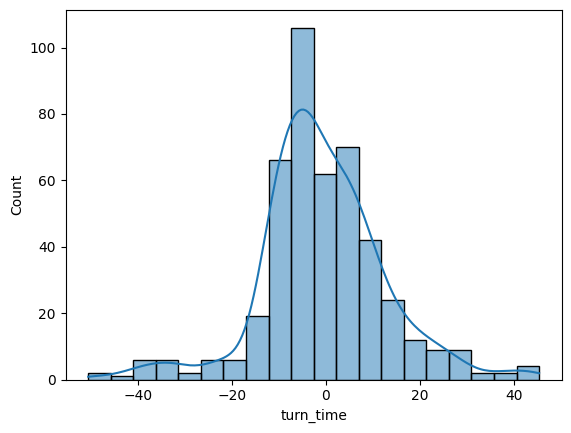

In [199]:
sns.histplot(x = y_test - y_pred,data =df, bins =20, kde = True)

##Gradiant BOOST

In [200]:
GradBoost_model = GradientBoostingRegressor(max_depth = 3, n_estimators = 100,learning_rate =0.1)
print(ADABOOST_model)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=1,
                                                       random_state=0),
                  learning_rate=1)


In [201]:
GradBoost_model.fit(x_train,y_train)

GradientBoostingRegressor()

In [202]:
y_pred= GradBoost_model.predict(x_test)

In [203]:
GradBoost_model.score(x_test,y_test)

0.8387523216072484

In [204]:
kfold_validation=KFold(10)
results=cross_val_score(GradBoost_model,x,y,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.6735331  0.81553829 0.73700181 0.7910097  0.66645531 0.69028864
 0.81114895 0.81426054 0.71677241 0.81147023]
0.7527478973760455


In [205]:
r2_score(y_test, y_pred)

0.8387523216072484

In [206]:
mse(y_test,y_pred)

134.6923843678528

In [207]:
rmse(y_test,y_pred)

11.605704819951816

In [208]:
mean_absolute_error(y_test,y_pred)

8.26249640659267

In [209]:
MAPE=mape(y_test,y_pred)
print(MAPE)

32.476303011303145


<Axes: xlabel='turn_time', ylabel='Count'>

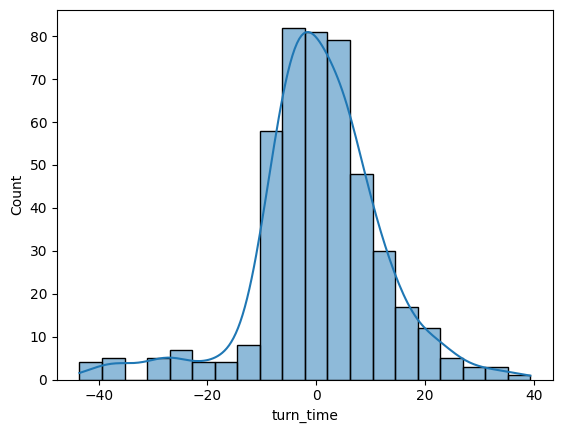

In [210]:
sns.histplot(x = y_test - y_pred,data =df, bins =20, kde = True)

##Elasticnet

In [211]:
enet_model = ElasticNet(alpha=1.0,l1_ratio = 0.5 )

In [212]:
enet_model.fit(x_train,y_train)

ElasticNet()

In [213]:
y_pred=enet_model.predict(x_test)

In [214]:
enet_model.score(x_test,y_test)

0.7182895506869886

In [215]:
r2_score(y_test, y_pred)

0.7182895506869886

In [216]:
kfold_validation=KFold(10)
results=cross_val_score(enet_model,x,y,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.49324834 0.74500763 0.68335813 0.73073455 0.47362689 0.63393132
 0.72655132 0.74515818 0.68219969 0.75910199]
0.6672918039466299


In [217]:
mse(y_test,y_pred)

235.3165794231635

In [218]:
rmse(y_test,y_pred)

15.340031923798708

In [219]:
mean_absolute_error(y_test,y_pred)

12.384760796972653

In [220]:
MAPE=mape(y_test,y_pred)
print(MAPE)

58.4232919625921


In [221]:
residual=y_test - y_pred

<Axes: xlabel='turn_time', ylabel='Count'>

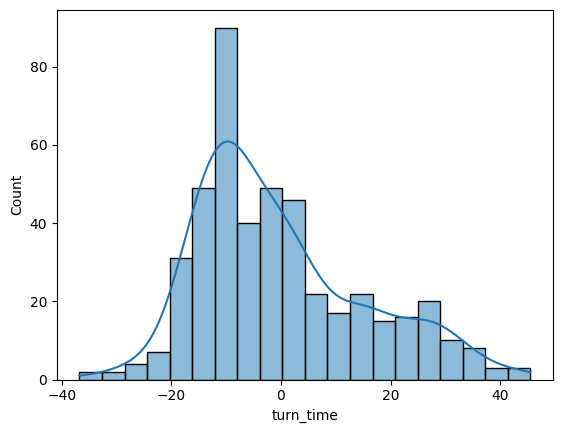

In [222]:
sns.histplot(x = y_test - y_pred,data =df, bins =20, kde = True)

<Axes: xlabel='turn_time', ylabel='Count'>

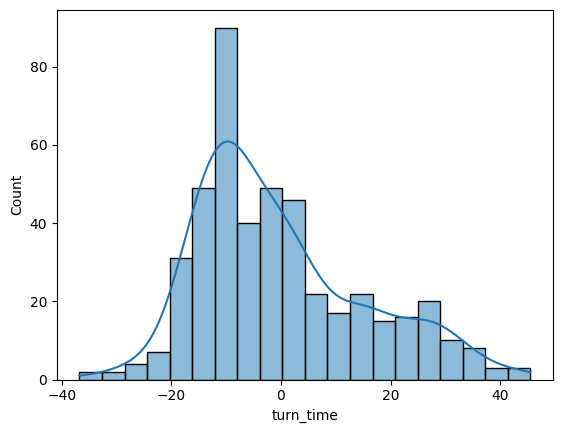

In [223]:
sns.histplot(x = y_test - y_pred,data =df, bins =20, kde = True)

#Design 2.Model Design with Both Numerical and Categorical Features with Count Frequency Encording

##Training and Testing Split

In [224]:
np.random.seed(42)
X1_train, X1_test, y_train, y_test = train_test_split(df_count_frq,y, test_size=0.2,random_state=42)

In [225]:
#Scale the varibles according to standard normal distribution
scaler=StandardScaler()
x_train =scaler.fit_transform(X1_train)
x_test =scaler.transform(X1_test)

In [226]:
print('x_train',x_train.shape)
print('x_test',x_test.shape)
print('y_train',x_train.shape)
print('y_test',x_test.shape)

x_train (1823, 7)
x_test (456, 7)
y_train (1823, 7)
y_test (456, 7)


#Model Training

##Decission Tree Regression

In [227]:
DecissionTree_model = DecisionTreeRegressor()

In [228]:
DecissionTree_model.fit(x_train,y_train)

DecisionTreeRegressor()

In [229]:
y_pred= DecissionTree_model.predict(x_test)

In [230]:
DecissionTree_model.score(x_test,y_test)

0.7451467517415

In [231]:
kfold_validation=KFold(10)
results=cross_val_score(DecissionTree_model,x,y,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.38970752 0.64425919 0.61412753 0.62265225 0.40235106 0.60805573
 0.62740574 0.60754368 0.53741002 0.60656678]
0.566007951118764


In [232]:
r2_score(y_test, y_pred)

0.7451467517415

In [233]:
mse(y_test,y_pred)

212.8823931853443

In [234]:
np.sqrt(mse(y_test,y_pred))

14.590489819925317

In [235]:
rmse(y_test,y_pred)

14.590489819925317

In [236]:
mean_absolute_error(y_test,y_pred)

8.578717627401836

In [237]:
MAPE=mape(y_test,y_pred)
print(MAPE)

28.692139360909614


<Axes: xlabel='turn_time', ylabel='Count'>

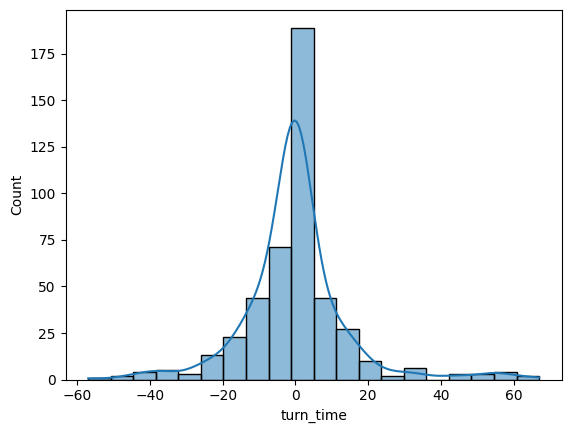

In [238]:
sns.histplot(x = y_test - y_pred,data =df, bins =20, kde = True)

##Random Forest Regression

In [239]:
RandomForest_model = RandomForestRegressor()

In [240]:
RandomForest_model.fit(x_train,y_train)

RandomForestRegressor()

In [241]:
y_pred= RandomForest_model.predict(x_test)

In [242]:
RandomForest_model.score(x_test,y_test)

0.8377536258524324

In [243]:
kfold_validation=KFold(10)
results=cross_val_score(RandomForest_model,x,y,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.64880113 0.76190031 0.72016283 0.78208801 0.60665405 0.68168226
 0.7573315  0.75678758 0.7104036  0.75790836]
0.7183719615578166


In [244]:
r2_score(y_test, y_pred)

0.8377536258524324

In [245]:
mse(y_test,y_pred)

135.5266085490319

In [246]:
rmse(y_test,y_pred)

11.641589605763977

In [247]:
mean_absolute_error(y_test,y_pred)

7.68730588228779

In [248]:
MAPE=mape(y_test,y_pred)
print(MAPE)

28.051604938325607


<Axes: xlabel='turn_time', ylabel='Count'>

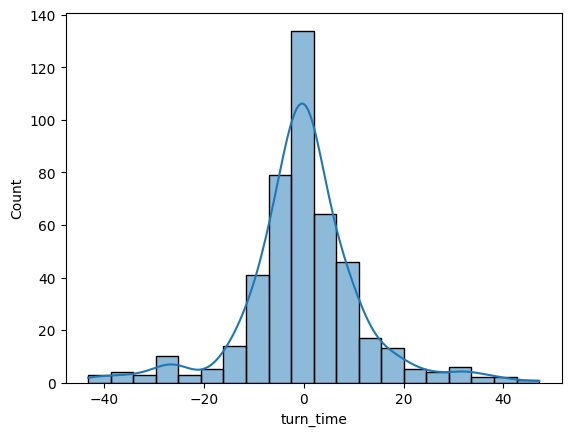

In [249]:
sns.histplot(x = y_test - y_pred,data =df, bins =20, kde = True)

##XGBOOST

In [250]:
XGBOOST_model = XGBRegressor()
print(XGBOOST_model)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)


In [251]:
XGBOOST_model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [252]:
y_pred= XGBOOST_model.predict(x_test)

In [253]:
XGBOOST_model.score(x_test,y_test)

0.8164824120379919

In [254]:
kfold_validation=KFold(10)
results=cross_val_score(XGBOOST_model,x,y,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.66093251 0.77694781 0.69982787 0.73458956 0.58944412 0.68527001
 0.76540682 0.74630393 0.70679476 0.7514981 ]
0.7117015500401084


In [255]:
r2_score(y_test, y_pred)

0.8164824120379919

In [256]:
mse(y_test,y_pred)

153.29474348048154

In [257]:
rmse(y_test,y_pred)

12.381225443407512

In [258]:
mean_absolute_error(y_test,y_pred)

8.287979353938187

In [259]:
MAPE=mape(y_test,y_pred)
print(MAPE)

29.826136663648544


<Axes: xlabel='turn_time', ylabel='Count'>

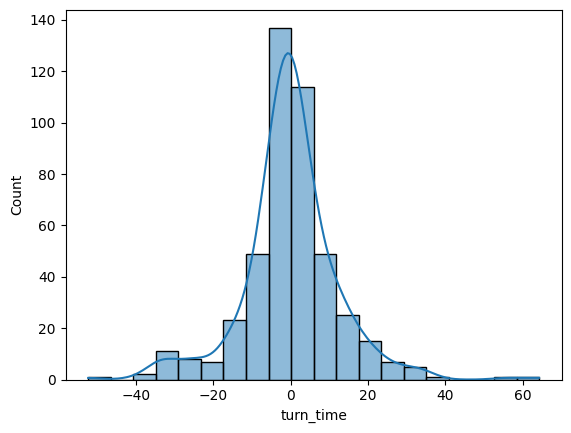

In [260]:
sns.histplot(x = y_test - y_pred,data =df, bins =20, kde = True)

##ADABOOST

In [261]:
DessicisionTree_estimator = DecisionTreeRegressor( max_depth = 1, random_state=0)
ADABOOST_model = AdaBoostRegressor(base_estimator = DessicisionTree_estimator, n_estimators = 50,learning_rate =1)
print(ADABOOST_model)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=1,
                                                       random_state=0),
                  learning_rate=1)


In [262]:
ADABOOST_model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=1,
                                                       random_state=0),
                  learning_rate=1)

In [263]:
y_pred= ADABOOST_model.predict(x_test)

In [264]:
ADABOOST_model.score(x_test,y_test)

0.7861880745461447

In [265]:
kfold_validation=KFold(10)
results=cross_val_score(ADABOOST_model,x,y,cv=kfold_validation)
print(results)
print(np.mean(results))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

[0.67480853 0.72934871 0.6741304  0.8074837  0.63383439 0.65152548
 0.79217434 0.77876639 0.64426445 0.80403102]
0.7190367403731098


In [266]:
r2_score(y_test, y_pred)

0.7861880745461447

In [267]:
mse(y_test,y_pred)

178.6000166496409

In [268]:
rmse(y_test,y_pred)

13.364131720753162

In [269]:
mean_absolute_error(y_test,y_pred)

9.840428363481877

In [270]:
MAPE=mape(y_test,y_pred)
print(MAPE)

42.57706504831995


<Axes: xlabel='turn_time', ylabel='Count'>

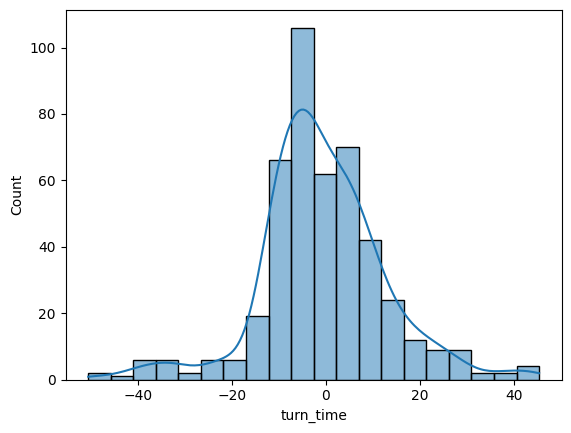

In [271]:
sns.histplot(x = y_test - y_pred,data =df, bins =20, kde = True)

##Gradiant BOOST

In [272]:
GradBoost_model = GradientBoostingRegressor(max_depth = 3, n_estimators = 100,learning_rate =0.1)
print(ADABOOST_model)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=1,
                                                       random_state=0),
                  learning_rate=1)


In [273]:
GradBoost_model.fit(x_train,y_train)

GradientBoostingRegressor()

In [274]:
y_pred= GradBoost_model.predict(x_test)

In [275]:
GradBoost_model.score(x_test,y_test)

0.8463137787050143

In [276]:
kfold_validation=KFold(10)
results=cross_val_score(GradBoost_model,x,y,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.6735331  0.81553829 0.73700181 0.7910097  0.66645531 0.69028864
 0.81114895 0.81426054 0.71677241 0.81147023]
0.7527478973760455


In [277]:
r2_score(y_test, y_pred)

0.8463137787050143

In [278]:
mse(y_test,y_pred)

128.37619615388905

In [279]:
rmse(y_test,y_pred)

11.330321979268243

In [280]:
mean_absolute_error(y_test,y_pred)

8.115774936444451

In [281]:
MAPE=mape(y_test,y_pred)
print(MAPE)

31.87967959737516


<Axes: xlabel='turn_time', ylabel='Count'>

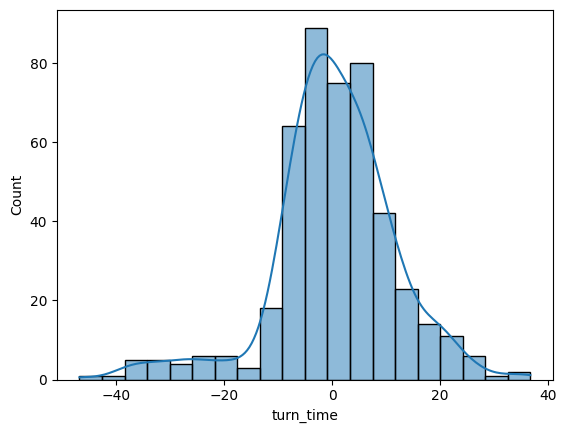

In [282]:
sns.histplot(x = y_test - y_pred,data =df, bins =20, kde = True)

##Elasticnet

In [283]:
enet_model = ElasticNet(alpha=1.0,l1_ratio = 0.5 )

In [284]:
enet_model.fit(x_train,y_train)

ElasticNet()

In [285]:
y_pred=enet_model.predict(x_test)

In [286]:
enet_model.score(x_test,y_test)

0.7174526699680543

In [287]:
r2_score(y_test, y_pred)

0.7174526699680543

In [288]:
kfold_validation=KFold(10)
results=cross_val_score(enet_model,x,y,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.49324834 0.74500763 0.68335813 0.73073455 0.47362689 0.63393132
 0.72655132 0.74515818 0.68219969 0.75910199]
0.6672918039466299


In [289]:
mse(y_test,y_pred)

236.01563729852825

In [290]:
rmse(y_test,y_pred)

15.362800438023278

In [291]:
mean_absolute_error(y_test,y_pred)

12.405335261919266

In [292]:
MAPE=mape(y_test,y_pred)
print(MAPE)

58.533337060783765


In [293]:
residual=y_test - y_pred

<Axes: xlabel='turn_time', ylabel='Count'>

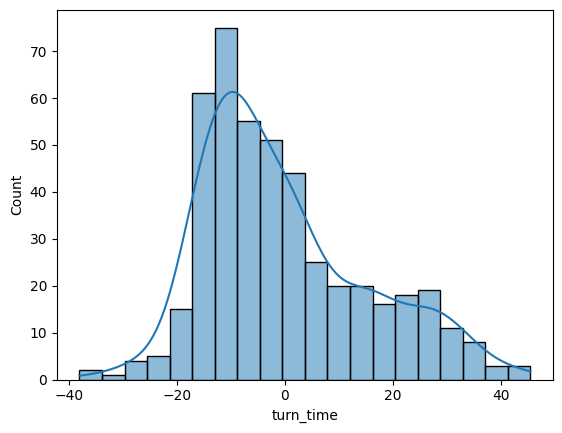

In [294]:
sns.histplot(x = y_test - y_pred,data =df, bins =20, kde = True)

#Desing 3.Model Design with only Numerical Features without Categorical Features.

##Training and Testing Split

In [295]:
np.random.seed(42)
X1_train, X1_test, y_train, y_test = train_test_split(num_features,y, test_size=0.2, random_state=42)

In [296]:
#Scale the varibales according to standard normal distribution
scaler=StandardScaler()
x_train =scaler.fit_transform(X1_train)
x_test =scaler.transform(X1_test)

#Model Training

##Decission Tree Regression

In [297]:
DecissionTree_model = DecisionTreeRegressor()

In [298]:
DecissionTree_model.fit(x_train,y_train)

DecisionTreeRegressor()

In [299]:
y_pred= DecissionTree_model.predict(x_test)

In [300]:
DecissionTree_model.score(x_test,y_test)

0.766589198152229

In [301]:
kfold_validation=KFold(10)
results=cross_val_score(DecissionTree_model,x,y,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.38970752 0.64425919 0.61412753 0.62265225 0.40235106 0.60805573
 0.62740574 0.60754368 0.53741002 0.60656678]
0.566007951118764


In [302]:
r2_score(y_test, y_pred)

0.766589198152229

In [303]:
mse(y_test,y_pred)

194.97122533146458

In [304]:
np.sqrt(mse(y_test,y_pred))

13.96320970735112

In [305]:
rmse(y_test,y_pred)

13.96320970735112

In [306]:
mean_absolute_error(y_test,y_pred)

8.60814726209463

In [307]:
MAPE=mape(y_test,y_pred)
print(MAPE)

31.118561524121873


<Axes: xlabel='turn_time', ylabel='Count'>

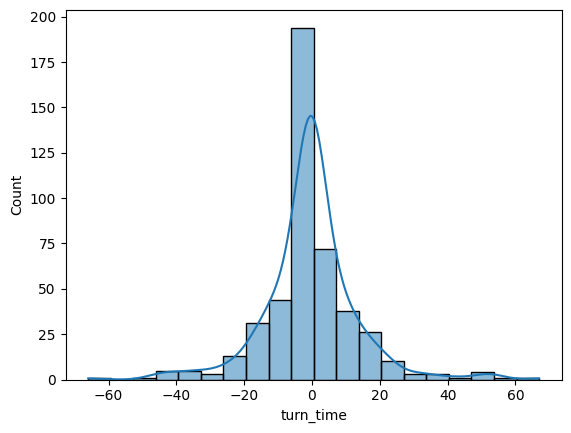

In [308]:
sns.histplot(x = y_test - y_pred,data =df, bins =20, kde = True)

##Random Forest Regression

In [309]:
RandomForest_model = RandomForestRegressor()

In [310]:
RandomForest_model.fit(x_train,y_train)

RandomForestRegressor()

In [311]:
y_pred= RandomForest_model.predict(x_test)

In [312]:
RandomForest_model.score(x_test,y_test)

0.8300934688074562

In [313]:
kfold_validation=KFold(10)
results=cross_val_score(RandomForest_model,x,y,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.64880113 0.76190031 0.72016283 0.78208801 0.60665405 0.68168226
 0.7573315  0.75678758 0.7104036  0.75790836]
0.7183719615578166


In [314]:
r2_score(y_test, y_pred)

0.8300934688074562

In [315]:
mse(y_test,y_pred)

141.92524217467076

In [316]:
rmse(y_test,y_pred)

11.91323810618552

In [317]:
mean_absolute_error(y_test,y_pred)

7.868179889782201

In [318]:
MAPE=mape(y_test,y_pred)
print(MAPE)

29.406663709533632


<Axes: xlabel='turn_time', ylabel='Count'>

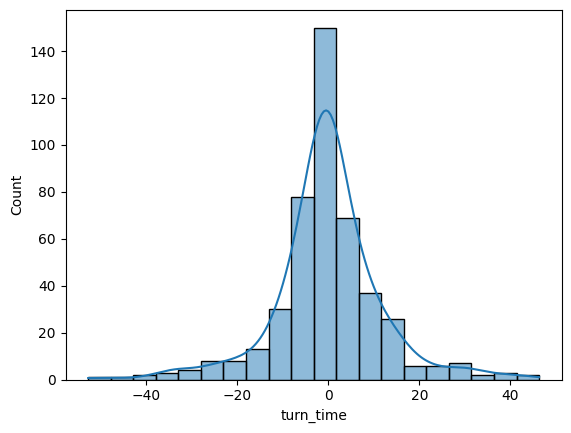

In [319]:
sns.histplot(x = y_test - y_pred,data =df, bins =20, kde = True)

##XGBOOST

In [320]:
XGBOOST_model = XGBRegressor()
print(XGBOOST_model)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)


In [321]:
XGBOOST_model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [322]:
y_pred= XGBOOST_model.predict(x_test)

In [323]:
XGBOOST_model.score(x_test,y_test)

0.8167218130562087

In [324]:
kfold_validation=KFold(10)
results=cross_val_score(XGBOOST_model,x,y,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.66093251 0.77694781 0.69982787 0.73458956 0.58944412 0.68527001
 0.76540682 0.74630393 0.70679476 0.7514981 ]
0.7117015500401084


In [325]:
r2_score(y_test, y_pred)

0.8167218130562087

In [326]:
mse(y_test,y_pred)

153.09476854574064

In [327]:
rmse(y_test,y_pred)

12.373147075248909

In [328]:
mean_absolute_error(y_test,y_pred)

8.426064887590575

In [329]:
MAPE=mape(y_test,y_pred)
print(MAPE)

31.06846058306759


<Axes: xlabel='turn_time', ylabel='Count'>

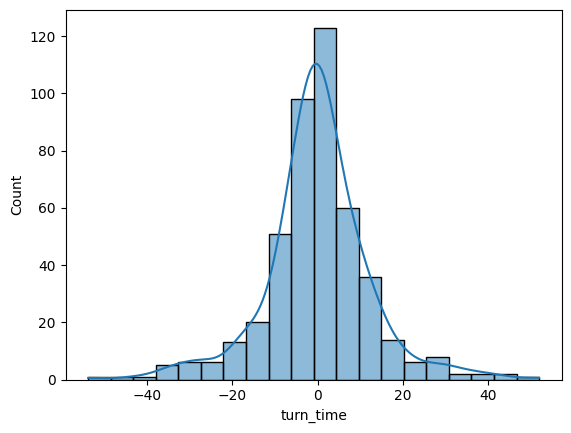

In [330]:
sns.histplot(x = y_test - y_pred,data =df, bins =20, kde = True)

##ADABOOST

In [331]:
DessicisionTree_estimator = DecisionTreeRegressor( max_depth = 1, random_state=0)
ADABOOST_model = AdaBoostRegressor(base_estimator = DessicisionTree_estimator, n_estimators = 50,learning_rate =1)
print(ADABOOST_model)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=1,
                                                       random_state=0),
                  learning_rate=1)


In [332]:
ADABOOST_model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=1,
                                                       random_state=0),
                  learning_rate=1)

In [333]:
y_pred= ADABOOST_model.predict(x_test)

In [334]:
ADABOOST_model.score(x_test,y_test)

0.7861880745461447

In [335]:
kfold_validation=KFold(10)
results=cross_val_score(ADABOOST_model,x,y,cv=kfold_validation)
print(results)
print(np.mean(results))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

[0.67480853 0.72934871 0.6741304  0.8074837  0.63383439 0.65152548
 0.79217434 0.77876639 0.64426445 0.80403102]
0.7190367403731098


In [336]:
r2_score(y_test, y_pred)

0.7861880745461447

In [337]:
mse(y_test,y_pred)

178.6000166496409

In [338]:
rmse(y_test,y_pred)

13.364131720753162

In [339]:
mean_absolute_error(y_test,y_pred)

9.840428363481877

In [340]:
MAPE=mape(y_test,y_pred)
print(MAPE)

42.57706504831995


<Axes: xlabel='turn_time', ylabel='Count'>

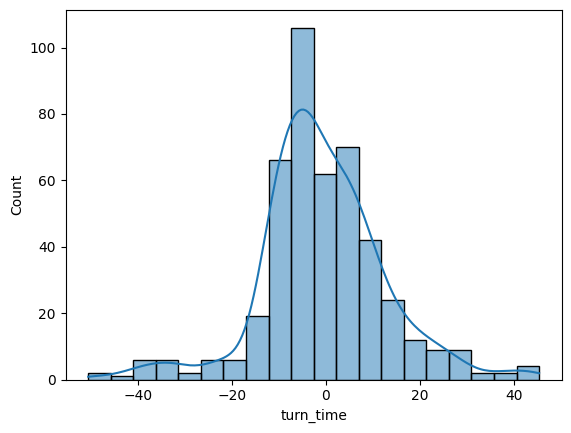

In [341]:
sns.histplot(x = y_test - y_pred,data =df, bins =20, kde = True)

##Gradiant BOOST

In [342]:
GradBoost_model = GradientBoostingRegressor(max_depth = 3, n_estimators = 100,learning_rate =0.1)
print(ADABOOST_model)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=1,
                                                       random_state=0),
                  learning_rate=1)


In [343]:
GradBoost_model.fit(x_train,y_train)

GradientBoostingRegressor()

In [344]:
y_pred= GradBoost_model.predict(x_test)

In [345]:
kfold_validation=KFold(10)
results=cross_val_score(GradBoost_model,x,y,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.6735331  0.81553829 0.73700181 0.7910097  0.66645531 0.69028864
 0.81114895 0.81426054 0.71677241 0.81147023]
0.7527478973760455


In [346]:
GradBoost_model.score(x_test,y_test)

0.8435820960248948

In [347]:
r2_score(y_test, y_pred)

0.8435820960248948

In [348]:
mse(y_test,y_pred)

130.65800794298957

In [349]:
rmse(y_test,y_pred)

11.430573386448712

In [350]:
mean_absolute_error(y_test,y_pred)

8.17627011621687

In [351]:
MAPE=mape(y_test,y_pred)
print(MAPE)

32.577936393709734


<Axes: xlabel='turn_time', ylabel='Count'>

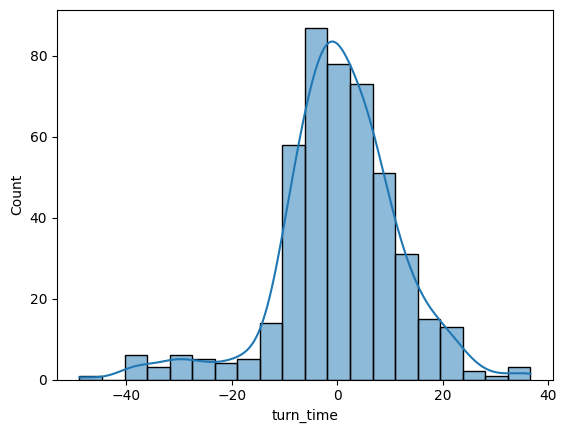

In [352]:
sns.histplot(x = y_test - y_pred,data =df, bins =20, kde = True)

##Elasticnet

In [353]:
enet_model = ElasticNet(alpha=1.0,l1_ratio = 0.5 )

In [354]:
enet_model.fit(x_train,y_train)

ElasticNet()

In [355]:
y_pred=enet_model.predict(x_test)

In [356]:
enet_model.score(x_test,y_test)

0.7176045207999948

In [357]:
r2_score(y_test, y_pred)

0.7176045207999948

In [358]:
kfold_validation=KFold(10)
results=cross_val_score(enet_model,x,y,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.49324834 0.74500763 0.68335813 0.73073455 0.47362689 0.63393132
 0.72655132 0.74515818 0.68219969 0.75910199]
0.6672918039466299


In [359]:
mse(y_test,y_pred)

235.88879422812775

In [360]:
rmse(y_test,y_pred)

15.358671629673179

In [361]:
mean_absolute_error(y_test,y_pred)

12.406919447258486

In [362]:
MAPE=mape(y_test,y_pred)
print(MAPE)

58.58568009629684


In [363]:
residual=y_test - y_pred

<Axes: xlabel='turn_time', ylabel='Count'>

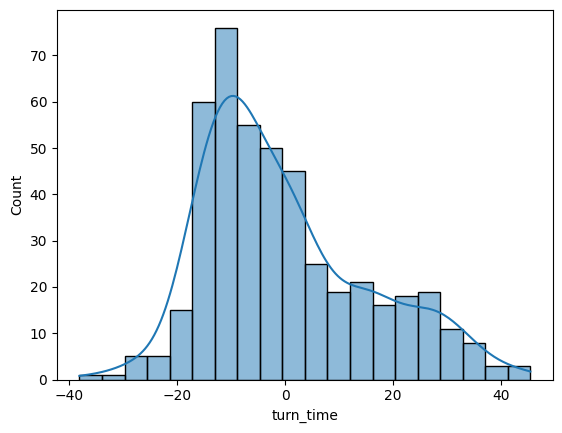

In [364]:
sns.histplot(x = y_test - y_pred,data =df, bins =20, kde = True)